## Dataset: brain.csv

---

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to to the Size of the Head", Biometrika, Vol. 4, pp105-123
Description: Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns GENDER: 
- Gender: 1=Male, 2=Female
- AGE: Age Range 1=20-46, 2=46+
- SIZE: Head size (cm^3) 21-24 
- WEIGHT: Brain weight (grams) 29-32

---

In [ ]:
Agenda: Predicting the brain size 

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the csv file into pandas dataframe

brain = pd.read_csv('Data/brain.csv')
brain[:5].T

,0,1,2,3,4
gender,1,1,1,1,1
age,1,1,1,1,1
size,4512,3738,4261,3777,4177
weight,1530,1297,1335,1282,1590


In [3]:
brain.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,237.0,1.434599,0.496753,1.0,1.0,1.0,2.0,2.0
age,237.0,1.535865,0.499768,1.0,1.0,2.0,2.0,2.0
size,237.0,3633.991561,365.261422,2720.0,3389.0,3614.0,3876.0,4747.0
weight,237.0,1282.873418,120.340446,955.0,1207.0,1280.0,1350.0,1635.0


In [4]:
# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = brain['weight'].values.reshape(-1,1)
y = brain['size'].values.reshape(-1,1)

print('Shape: ', X.shape, y.shape)

Shape:  (237, 1) (237, 1)


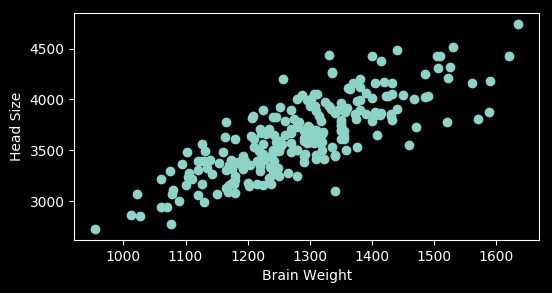

In [5]:
# Plot the data to see if a linear trend exists

plt.style.use('dark_background')
fig = plt.figure(figsize=(6,3), dpi=100)
plt.scatter(X,y)
plt.xlabel('Brain Weight')
plt.ylabel('Head Size')
plt.show()

In [6]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create the Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
# Fit the mdoel to our data

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# Get the Mean_Squared Error and the r-squared value

from sklearn.metrics import mean_squared_error, r2_score

#Use our model to make predictions

predicted = model.predict(X_test)


# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


print(f'Mean-squared error(MSE): {mse}')
print(f'Root-squared score(r2): {r2}')

Mean-squared error(MSE): 51228.19330570998
Root-squared score(r2): 0.6568088729208812


In [10]:
# Call the ``score`` method on the model to show the r2 score

model.score(X_test, y_test)

0.6568088729208812